<a href="https://colab.research.google.com/github/GhassenSmaoui/Wine_quality_prediction/blob/master/Wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#this project predicts the quality of wine based on several features/ attributes 
#the quality is ranked on a scale from 0 to 10
# Let us just start by importing dependencies  

from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)
from sklearn.model_selection import train_test_split
from sklearn import preprocessing # the preprocessing module is used in the below cell to scale the data (normalize it )

After importing the dependencies it is time to upload the data.
the data file is named "winequality-red" that you can find in the repository.
This file should be first downloaded to your local hard drive in order for you to be able to import it to this colab notebook.


In [2]:
#run this cell and upload the "winequality-red" file that you already downloaded to your local drive
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [3]:

import io
wine_quality_data = pd.read_csv(io.BytesIO(uploaded['winequality-red.csv']), sep = ';')
wine_quality_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
wine_quality_data = wine_quality_data.reindex(np.random.permutation(wine_quality_data.index))
wine_quality_data.reset_index(inplace=True, drop=True)
wine_quality_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.8,0.310,0.40,2.8,0.109,7.0,16.0,0.99614,3.31,0.79,11.8,7
1,8.2,0.885,0.20,1.4,0.086,7.0,31.0,0.99460,3.11,0.46,10.0,5
2,8.2,0.400,0.31,1.9,0.082,8.0,24.0,0.99600,3.24,0.69,10.6,6
3,10.0,0.260,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,8
4,9.9,0.490,0.58,3.5,0.094,9.0,43.0,1.00040,3.29,0.58,9.0,5


In [0]:
labels = wine_quality_data.pop('quality')

In [0]:
labels /=10 

In [7]:
wine_quality_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,8.8,0.310,0.40,2.8,0.109,7.0,16.0,0.99614,3.31,0.79,11.8
1,8.2,0.885,0.20,1.4,0.086,7.0,31.0,0.99460,3.11,0.46,10.0
2,8.2,0.400,0.31,1.9,0.082,8.0,24.0,0.99600,3.24,0.69,10.6
3,10.0,0.260,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8
4,9.9,0.490,0.58,3.5,0.094,9.0,43.0,1.00040,3.29,0.58,9.0


In [8]:
wine_quality_data = preprocessing.scale(wine_quality_data)
np.matrix(wine_quality_data)

matrix([[ 0.27598301, -1.21684919,  0.66254621, ..., -0.0072127 ,
          0.77809425,  1.29256787],
        [-0.06873526,  1.99537484, -0.36446304, ..., -1.30306833,
         -1.16933729, -0.39704261],
        [-0.06873526, -0.7140663 ,  0.20039205, ..., -0.46076217,
          0.18796348,  0.16616088],
        ...,
        [-0.24109439, -1.10511966, -0.21041165, ..., -0.13679827,
         -0.04808883, -1.05411336],
        [ 0.67815432, -0.37887771, -0.15906119, ..., -1.23827555,
          0.48302886, -0.39704261],
        [-0.35600048,  0.98980905, -0.87796766, ...,  0.51112954,
         -0.99229806, -0.67864436]])

In [0]:
X_train, X_test , Y_train , Y_test = train_test_split(wine_quality_data, labels, random_state = 0)

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 11, input_shape = [11], activation = tf.nn.leaky_relu),
    tf.keras.layers.Dense(10, input_shape = [11], activation=tf.nn.leaky_relu),
    tf.keras.layers.Dense(9, input_shape = [10], activation=tf.nn.leaky_relu),
    tf.keras.layers.Dense(8, input_shape = [9], activation=tf.nn.leaky_relu),
    tf.keras.layers.Dense(7, input_shape = [8], activation=tf.nn.leaky_relu),
    tf.keras.layers.Dense(1, input_shape = [7], activation=tf.nn.sigmoid)
])

In [0]:

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='MeanSquaredError'
             )

In [12]:

#model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))
history = model.fit(X_train, Y_train, epochs=10000,  verbose=False)
print("Finished training the model")

Finished training the model


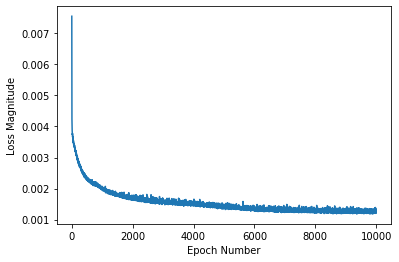

In [13]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [0]:
train_prediction = model.predict(X_train)

In [0]:
train_prediction *=10

In [0]:
train_prediction= np.rint(train_prediction)

In [0]:
type(Y_train)
Y_train= Y_train.to_numpy()

In [18]:
train_prediction.shape

(1199, 1)

In [0]:
Y_train*=10

In [0]:
Y_train.shape = train_prediction.shape

In [21]:

inc = 0
for i in range(Y_train.shape[0]):
  if np.array_equal(Y_train[i], train_prediction[i]):
    inc +=1
performance_value = (inc /Y_train.shape[0])*100
print (performance_value)

86.40533778148458
